<a href="https://colab.research.google.com/github/rohan-sharma84/AIMLCapstone/blob/main/Capstone_FastAI_Resnet152_mixup_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings; warnings.filterwarnings('ignore')
import torch
torch.cuda.empty_cache()

pytorch version:  1.8.0+cu101
fastai version:  1.0.61


In [ ]:
img_dir = '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/'
path = Path(img_dir)
path.ls()

[PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/AM General Hummer SUV 2000'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura Integra Type R 2001'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura RL Sedan 2012'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura TL Sedan 2012'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura TL Type-S 2008'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura TSX Sedan 2012'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura ZDX Hatchback 2012'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Aston Martin V8 Vantage Convertible 2012'),
 PosixPath('/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Aston Martin V8 Vantage Coupe 2012'),
 PosixPath('/cont

In [ ]:

## Transformation for Data Augmentation - default augmentaion
tfms = get_transforms()
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 300,seed=1984,ds_tfms = tfms,bs = 16).normalize(imagenet_stats)


In [ ]:
data

ImageDataBunch;

Train: LabelList (6516 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000,AM General Hummer SUV 2000
Path: /content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train;

Valid: LabelList (1628 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Chrysler PT Cruiser Convertible 2008,Volvo XC90 SUV 2007,Audi RS 4 Convertible 2008,Chevrolet TrailBlazer SS 2009,Chevrolet Monte Carlo Coupe 2007
Path: /content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train;

Test: None

In [ ]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(196, 196)

In [ ]:
#data.show_batch(rows = 3,figsize = (15,15))

In [ ]:

learn = cnn_learner(data, models.resnet152, metrics=error_rate, model_dir="/content/drive/MyDrive/CapstoneProject/tmp/model/Resnetmixup").mixup()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  236460 KB |  236460 KB |  472921 KB |  236460 KB |\n|       from large pool |  151552 KB |  151552 KB |  303104 KB |  151552 KB |\n|       from small pool |   84908 KB |   84908 KB |  169817 KB |   84908 KB |\n|---------------------------------------------------------------------------|\n| Active memory         |  236460 KB |  236460 KB |  472921 KB |  236460 KB |\n|       from large pool |  151552 KB |  151552 KB |

In [ ]:
import gc
gc.collect()

319

In [ ]:
learn.fit_one_cycle(7, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,5.992939,4.314662,0.893735,24:24
1,4.758320,3.259054,0.745086,04:36
2,3.987985,2.474165,0.602580,04:36
3,3.459651,1.963251,0.492629,04:35
4,2.995059,1.657139,0.412776,04:35
5,2.804335,1.511760,0.371622,04:35
6,2.721594,1.484683,0.366093,04:36


In [ ]:
learn.save('ResNet152_freeze_step1')

In [ ]:
learn.unfreeze()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


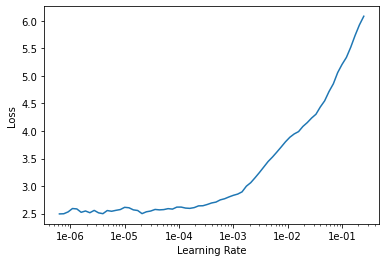

In [ ]:
# look at the learning rate to not use the learning rates which causes the loss to diverge
learn.lr_find()
learn.recorder.plot()

Retraining the whole Neural network instead of last layer. max_lr takes a slice argument. That is telling the model to linearly decrease learning rates as the models goes deeper.

Earlier layers will have a smaller learning rate, latter one will have higher. This is due to the fact that as the models goes deeper, each layer learns to capture features that is more specific to the problem domain. We want the early layers to update less as they capture more general features such as edge and corners, which are usually general to many vision problems.

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.641788,1.300033,0.306511,05:30
1,2.895015,1.438750,0.354423,05:30
2,2.874367,1.346929,0.343366,05:30
3,2.577080,1.095169,0.291155,05:30
4,2.299426,0.895729,0.230344,05:31
5,2.105458,0.687512,0.180590,05:30
6,1.917517,0.586298,0.148034,05:29
7,1.721849,0.487464,0.117936,05:29
8,1.615074,0.444759,0.108108,05:29
9,1.575288,0.442484,0.108108,05:29


In [ ]:
learn.save('Resnet152_unfreeze_step2',return_path=True)

PosixPath('/content/drive/MyDrive/CapstoneProject/tmp/model/Resnetmixup/Resnet152_unfreeze_step2.pth')

In [ ]:
# Testing data
test_path = '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/'
test_data = ImageDataBunch.from_folder(f'{test_path}',valid_pct = 0,size = 224,seed=1984,bs = 64).normalize(imagenet_stats)

In [ ]:
learn.data.valid_dl = test_data.train_dl
learn.validate()

[0.6192779, tensor(0.1681)]

Reduce learning rate more
Transfer Learning from a mixup model to one without
Experiment with different weight decay

In [ ]:
"""learn.lr_find()
learn.recorder.plot()"""

'learn.lr_find()\nlearn.recorder.plot()'

In [ ]:
learn.fit_one_cycle(7, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.655855,0.615527,0.167750,07:35
1,1.568208,0.611421,0.163000,07:34
2,1.608186,0.603259,0.164625,07:36
3,1.589627,0.599653,0.160875,07:38
4,1.542508,0.583778,0.159000,07:37


In [ ]:
learn.save('Resnet152_unfreeze_step3',return_path=True)

In [ ]:
learn.fit_one_cycle(7, max_lr=slice(1e-6, 1e-4), wd=0.005) #adding weight decay

In [ ]:
learn.save('Resnet152_unfreeze_step4',return_path=True)

In [ ]:
"""learn.lr_find()
learn.recorder.plot()"""

Final test

In [ ]:
learn.data.valid_dl = test_data.train_dl
learn.validate()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
input, target = learn.get_preds()

In [ ]:
print (top_k_accuracy(input=input, targs=target,k=1))

In [ ]:
print (top_k_accuracy(input=input, targs=target,k=3))